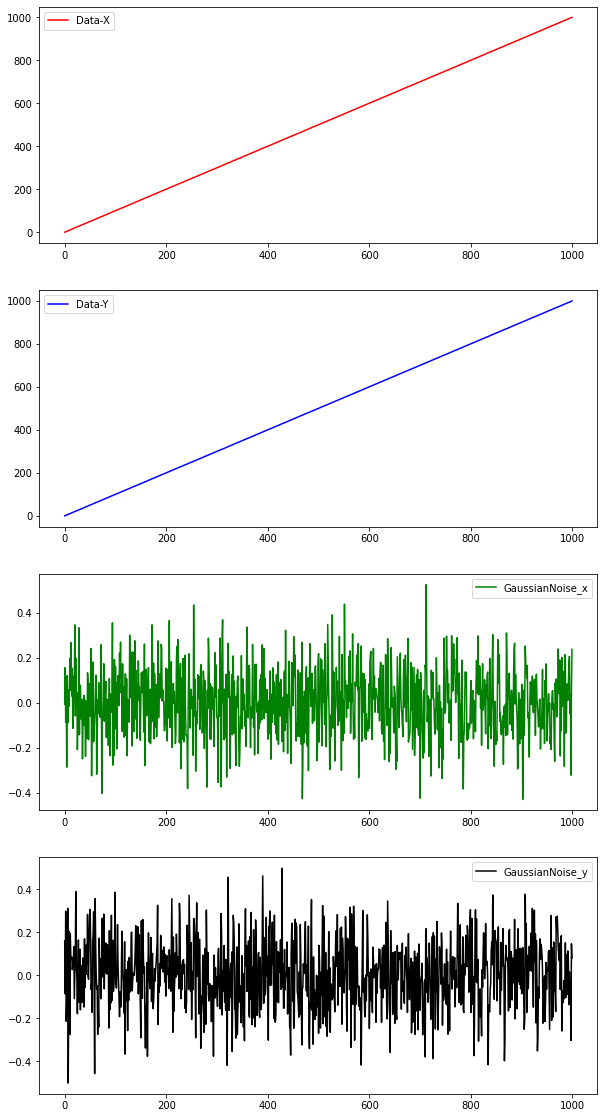

In [206]:
# Gulsade Rabia Cakmak 

import numpy as np
import matplotlib.pyplot as plt


dataRaw_x= np.arange(1000)  # Data is generated by using np.arange() function
dataRaw_y= np.arange(1000)
index=np.arange(1000)
mu=0
sigma=0.15 #Mu and sigma values are specified

GaussianNoise_x = np.random.normal(mu,sigma,len(dataRaw_x)) #Two different gaussian noise is produced and they are added to the raw data array
GaussianNoise_y = np.random.normal(mu,sigma,len(dataRaw_y))

data_x= np.add(dataRaw_x,GaussianNoise_x, dtype='float32')
data_y= np.add(dataRaw_y,GaussianNoise_y, dtype='float32')

plt.figure(figsize=(10, 20))   #This part is to visualize the dataset and the added noise
plt.subplot(411)
plt.plot(data_x, color='r', label='Data-X')
plt.legend()
plt.subplot(412)
plt.plot(data_y, color='b', label='Data-Y')
plt.legend()
plt.subplot(413)
plt.plot(GaussianNoise_x, color='g', label='GaussianNoise_x')
plt.legend()
plt.subplot(414)
plt.plot(GaussianNoise_y, color='k', label='GaussianNoise_y')
plt.legend()
plt.show()

In [207]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

data_x = torch.from_numpy(data_x/np.max(data_x))  #In order to create a pytorch model, the np.ndarray is converted to tensor. Here, the normalization is done, due to large values. It is quite hard to train an algorithm with those large values.
data_y = torch.from_numpy(data_y/np.max(data_y))
dataset = TensorDataset(data_x, data_y)  #The tensor dataset which contains both x and y values in the tuple format 
trainSize = int(0.8 * len(dataset)) #The train:test ratio is determined as 4:1
testSize = len(dataset) - trainSize
trainSet, testSet = torch.utils.data.random_split(dataset, [trainSize, testSize]) #Random splitting of the dataset is done by using random_split() method





In [208]:
from torch.utils.data import DataLoader

loaded_TrainSet = DataLoader(trainSet, shuffle=True) #The dataset (subset) needs to be converted into DataLoader type
loaded_TestSet = DataLoader(testSet, shuffle=True)


In [209]:
model=torch.nn.Linear(1,1) #Model consists of a linear regression method. Since the dataset was not complex, I preferred to create 1 Layer-Model
lossFunction = torch.nn.functional.mse_loss #Mean Squared Error is used as cost function
optimizer = torch.optim.Adam(model.parameters()) #Adam optimizer is preferred 


In [210]:
weigth_array=np.empty(80000) #since 800 element is iterator over 100 epoch, the number of produced weight/bias will be 800*100
bias_array=np.empty(80000)
c=0;
for epoch in range(100):  #epoch number is determined as 100
  for x,y in loaded_TrainSet: 

    predictedValue = model(x) #The model is trained by this algorithm
    lossValue = lossFunction(predictedValue, y) #loss value is calculated by referring to the MSE
    lossValue.backward() #backward() function computes the derivative of the loss value. The gradient is formed
    optimizer.step() #The update on the parameters by gradient is done 
    optimizer.zero_grad() #The gradient is cleared for the parameters
    print('epoch {}, loss {}'.format(epoch, lossValue.item()))
    param = model.state_dict() 
    weigth_array[c]=param['weight'] #The weigth and bias are appended inside an array. It is done for the visualization process below.
    bias_array[c]=param['bias']
    c+=1
    


Görüntülenen çıkış son 5000 satıra kısaltıldı.
epoch 93, loss 1.770692392710771e-08
epoch 93, loss 4.025208966140781e-08
epoch 93, loss 6.833861334598623e-07
epoch 93, loss 9.95699025452268e-08
epoch 93, loss 3.833752657556033e-07
epoch 93, loss 1.4688659177863883e-07
epoch 93, loss 1.4987131180532742e-07
epoch 93, loss 1.1705338920364738e-09
epoch 93, loss 1.8499213183531538e-07
epoch 93, loss 4.809423330698337e-07
epoch 93, loss 7.232665666379035e-08
epoch 93, loss 4.2876550310211314e-08
epoch 93, loss 2.456170875575481e-07
epoch 93, loss 1.8391696698927262e-07
epoch 93, loss 7.194245199571014e-08
epoch 93, loss 5.0688761632500245e-08
epoch 93, loss 2.1759048252079083e-07
epoch 93, loss 2.088932546939759e-07
epoch 93, loss 3.150718441702338e-08
epoch 93, loss 1.0522573035132154e-08
epoch 93, loss 2.8377971972304294e-08
epoch 93, loss 1.1137331057398114e-07
epoch 93, loss 4.235974770949724e-08
epoch 93, loss 1.179712327825655e-08
epoch 93, loss 4.283165822016599e-09
epoch 93, loss 8.1

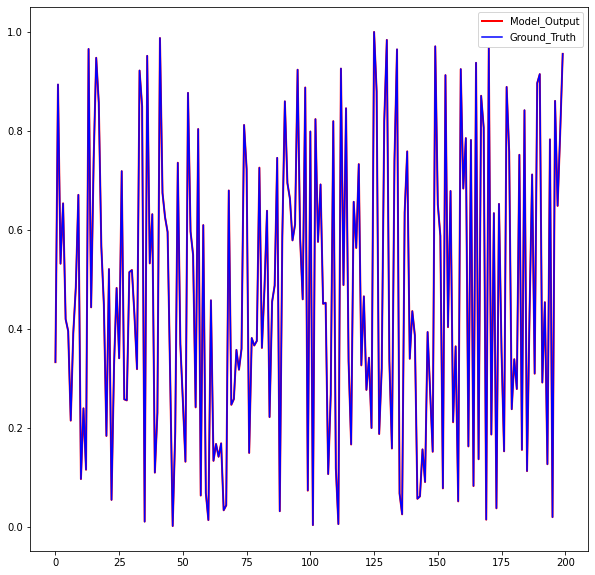

The loss value of model on Test Set : tensor(8.8679e-08, grad_fn=<DivBackward0>)


In [211]:
result_Array_x=np.empty(200)
result_Array_y=np.empty(200)
c=0
lossTest=0
for x,y in loaded_TestSet: #The model is tested on the test set, which contains 200 elements

    result= model(x)
    result_Array_x[c]=result  #The output of the algorithm, real y value are appended to be used below.
    result_Array_y[c]=y
    lossTest += lossFunction(result, y) #The loss value for every element is obtained to calculate the average loss value below.
    c+=1

plt.figure(figsize=(10,10))
plt.plot(result_Array_x, color='r', label='Model_Output', linewidth=2.0)
plt.plot(result_Array_y,color='b', label='Ground_Truth')
plt.legend()
plt.show()

print("The loss value of model on Test Set :",  lossTest/200 ) #Here, the average loss value for the test set is calculated.

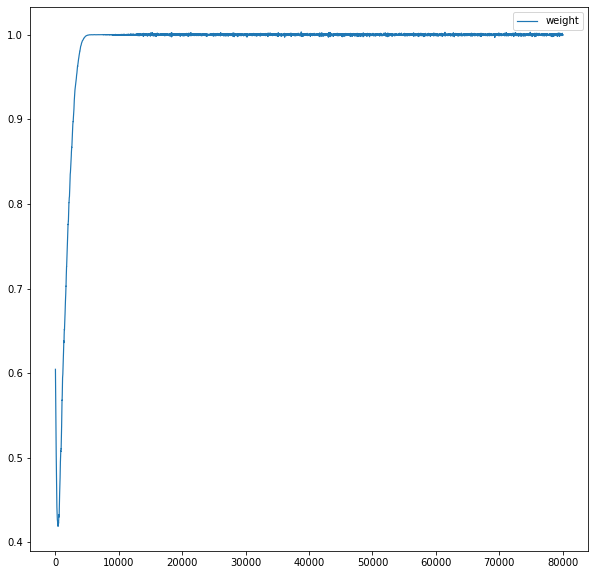

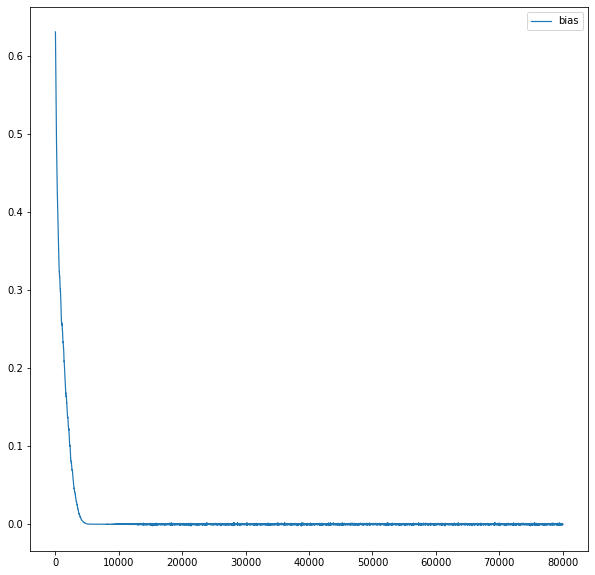

In [214]:
plt.figure(figsize=(10,10))  #Weight and Bias are visualized.
plt.plot(weigth_array, linewidth=1.2, label='weight')
plt.legend()
plt.figure(figsize=(10,10))
plt.plot(bias_array, linewidth=1.2, label='bias')
plt.legend()


In [215]:
print(weigth_array[:])
print(bias_array[:])

[0.60466117 0.60369515 0.60271889 ... 1.00005424 0.99998784 0.99994576]
[ 6.30575240e-01  6.29645109e-01  6.28684998e-01 ... -8.65812617e-05
 -9.45573411e-05 -8.60564905e-05]


In [219]:
#the results for weight and bias:

print(weigth_array[-1])
print(bias_array[-1])

0.9999457597732544
-8.605649054516107e-05


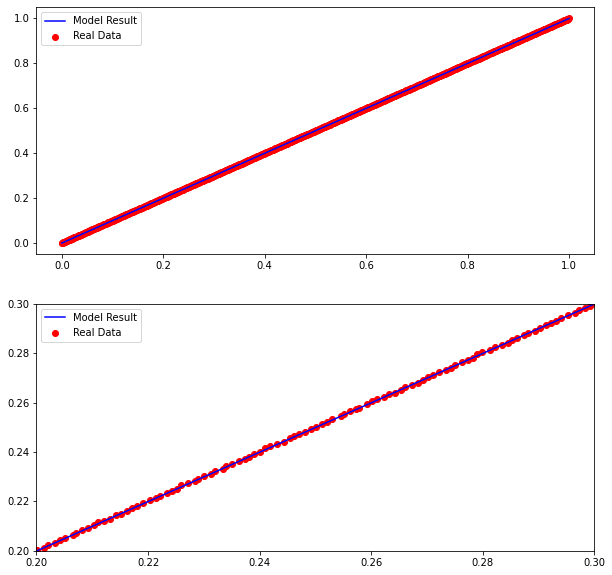

In [218]:

Model_output=weigth_array[-1]*data_x + bias_array[-1]  #Here the y values are calculated by using the final weight and the bias of the model.


plt.figure(figsize=(10,10))
plt.subplot(211)
plt.scatter(data_x, data_y, color='r', label='Real Data') #The real data values and model outputs are compared below.
plt.plot(data_x,Model_output, color='b', label='Model Result' )
plt.legend()
plt.subplot(212)
plt.scatter(data_x, data_y, color='r', label='Real Data')
plt.plot(data_x,Model_output, color='b', label='Model Result' )
plt.axis([0.2,0.3,0.2,0.3]) #This is done to zoom in the graph.
plt.legend()
plt.show()


In [ ]:
## Linear Regression By using Numpy Library

In [226]:
x_data= np.add(dataRaw_x,GaussianNoise_x, dtype='float32')
y_data= np.add(dataRaw_y,GaussianNoise_y, dtype='float32')

x_data_rescaled=x_data/np.max(dataRaw_x)  #The dataset is normalized, so that the training process can be effective.
y_data_rescaled=y_data/np.max(dataRaw_y)


def MSE_value (bias_new ,weight_new, x_new, y_new):  #The mean squared error is written as a function, corresponding to its mathematical operation. As a result, mean square error of the 
  predicted_y= x_new*weight_new + bias_new           # given data can be calculated.
  squared_error=pow((predicted_y-y_new), 2)
  mean_squared_error=sum(squared_error)/len(x_new)
  return mean_squared_error
  
def Gradient_value(bias_new ,weight_new, x_new, y_new):  #The gradient which is used in the backpropagation and updating the weight and bias
  predicted_y= x_new*(weight_new) + bias_new             #These are created by using the formulas on the literature
  weight_derivative = -(2/len(x_new))*sum(x_new*(y_new-predicted_y))
  bias_derivative = -(2/len(x_new))*sum(y_new-predicted_y)
  return weight_derivative, bias_derivative

init_weight=0.1 #initial weight and bias is given here.
init_bias=0.01
lr=0.01  #The learning rate is adjusted to 0.01 after experiments with much smaller learning rate values.
cost_value=0

loss_stock=[]  #The loss, weights and the bias values are stored for visualization process below.
weight_stock=[]
bias_stock=[]
for epoch in range(5000): #Here epoch is adjusted to 2000, it is done due to ineffective training in small epoch values
  
    
  
  cost_value=MSE_value(init_bias,init_weight, x_data_rescaled[:800], y_data_rescaled[:800]) #Cost value is calculated, by using the written function above.
  weight_derivative, bias_derivative= Gradient_value(init_bias,init_weight, x_data_rescaled[:800], y_data_rescaled[:800]) #The derivatives are calculated by using the written function above.
  init_weight = init_weight - (lr * weight_derivative) #The weight and bias are updated by using the formulas on the literature
  init_bias = init_bias - (lr * bias_derivative)
    
  
  loss_stock.append(cost_value)
  weight_stock.append(init_weight)
  bias_stock.append(init_bias)

  print('epoch {}, loss {}'.format(epoch, cost_value))




epoch 0, loss 0.16571860080659812
epoch 1, loss 0.15948008975716005
epoch 2, loss 0.15352695824555754
epoch 3, loss 0.14784603619829778
epoch 4, loss 0.14242476223406966
epoch 5, loss 0.13725116147191652
epoch 6, loss 0.13231380220743436
epoch 7, loss 0.12760178559007798
epoch 8, loss 0.1231047153171713
epoch 9, loss 0.11881267599058999
epoch 10, loss 0.11471620543179652
epoch 11, loss 0.11080628007192693
epoch 12, loss 0.10707429498290563
epoch 13, loss 0.10351205185514142
epoch 14, loss 0.10011170083940196
epoch 15, loss 0.09686578778041277
epoch 16, loss 0.09376718449141908
epoch 17, loss 0.09080909577854128
epoch 18, loss 0.08798504268047708
epoch 19, loss 0.08528883809529729
epoch 20, loss 0.08271458906187634
epoch 21, loss 0.08025667005585674
epoch 22, loss 0.07790971746395227
epoch 23, loss 0.07566861142373421
epoch 24, loss 0.07352847694182418
epoch 25, loss 0.07148463999075934
epoch 26, loss 0.06953268407074688
epoch 27, loss 0.06766835788096465
epoch 28, loss 0.06588762384723

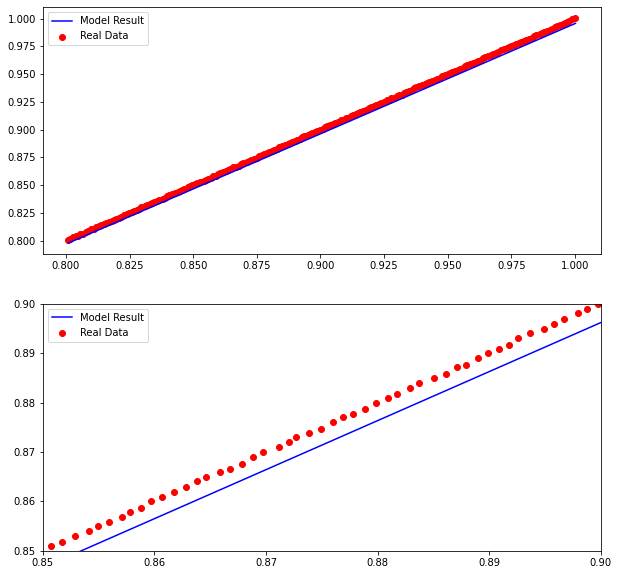

In [227]:
numpy_output=weight_stock[-1]*x_data_rescaled[800:] + bias_stock[-1]  #This is done to test the model coefficients on the test set.


plt.figure(figsize=(10,10))
plt.subplot(211)
plt.scatter(x_data_rescaled[800:], y_data_rescaled[800:], color='r', label='Real Data')
plt.plot(x_data_rescaled[800:],numpy_output, color='b', label='Model Result' )
plt.legend()
plt.subplot(212)
plt.scatter(x_data_rescaled[800:], y_data_rescaled[800:], color='r', label='Real Data')
plt.plot(x_data_rescaled[800:],numpy_output, color='b', label='Model Result' )
plt.axis([0.85,0.9,0.85,0.9]) #This is for zoom in the graph
plt.legend()
plt.show()

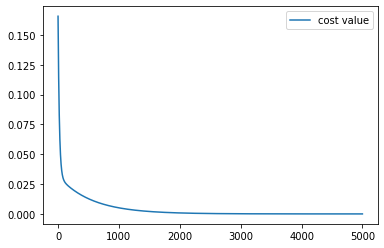

In [228]:
plt.plot(loss_stock, label='cost value')
plt.legend()

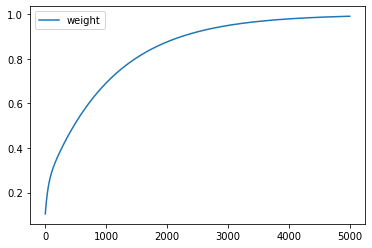

In [229]:
plt.plot(weight_stock, label='weight')
plt.legend()

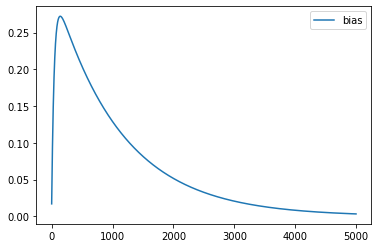

In [230]:
plt.plot(bias_stock, label='bias')
plt.legend()